### Prepare clean data

In [6]:
import pandas as pd 
import datetime as dt

In [7]:
pd.set_option('display.max_colwidth', None)

In [8]:
df = pd.read_csv('/Users/nathanjones/Downloads/EDA_p2/Sprint_Triathlon_EDA/data/wtc_sprint_data/all_wtc_sprint_results.csv')

In [9]:
#times to floats for sums and viz
df.drop(df.loc[df.POS.isin(['DNF', 'DNS'])].index, inplace=True)

cols_to_change_timedelta = ['Swim','T1', 'Bike', 'T2', 'Run', 'Time']
for col in cols_to_change_timedelta:
    df[col] = pd.to_timedelta(df[col]).dt.total_seconds()

#df['Time_format'] = pd.to_datetime(df['Time_in_seconds'], unit='s').dt.strftime('%H:%M:%S')


In [10]:
#Age (all relative, calculated dynamically from current date)

today = dt.date.today()
current_year = today.year
df['Age'] = current_year - df['YOB']


In [11]:
#dropping 0 times, which missed null check. 
df.drop(df.loc[df.Bike == df.Bike.min()].index, inplace=True)


In [12]:
#renaming Time col to Total_Time
df.rename(columns={'Time':'Total_Time'}, inplace=True)

### Show me some Summary Stats

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 778 entries, 0 to 794
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   POS         778 non-null    object 
 1   First Name  778 non-null    object 
 2   Last Name   778 non-null    object 
 3   Nation      778 non-null    object 
 4   YOB         778 non-null    int64  
 5   Start No.   778 non-null    int64  
 6   Swim        778 non-null    float64
 7   T1          778 non-null    float64
 8   Bike        778 non-null    float64
 9   T2          778 non-null    float64
 10  Run         778 non-null    float64
 11  Total_Time  778 non-null    float64
 12  Gender      778 non-null    object 
 13  Age         778 non-null    int64  
dtypes: float64(6), int64(3), object(5)
memory usage: 91.2+ KB


In [14]:
df.describe()

,YOB,Start No.,Swim,T1,Bike,T2,Run,Total_Time,Age
count,778.000000,778.000000,778.000000,778.000000,778.000000,778.00000,778.000000,778.000000,778.000000
mean,1995.390746,28.930591,563.164524,59.597686,1802.386889,27.12982,986.178663,3436.861183,29.609254
std,3.691308,16.768860,31.966620,25.335257,119.412820,6.11430,75.560132,202.627741,3.691308
min,1982.000000,1.000000,482.000000,28.000000,1565.000000,17.00000,820.000000,3003.000000,20.000000
25%,1993.000000,15.000000,540.000000,38.000000,1729.250000,23.00000,922.000000,3261.000000,27.000000
50%,1996.000000,29.000000,560.000000,57.500000,1790.500000,25.00000,989.500000,3438.000000,29.000000
75%,1998.000000,43.000000,588.750000,74.000000,1895.000000,32.00000,1038.000000,3595.000000,32.000000
max,2005.000000,64.000000,647.000000,132.000000,2192.000000,46.00000,1310.000000,4026.000000,43.000000


In [15]:
df[df.Gender == 'Male'].describe()

,YOB,Start No.,Swim,T1,Bike,T2,Run,Total_Time,Age
count,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000
mean,1995.720812,29.652284,539.954315,57.119289,1719.614213,26.121827,931.994924,3273.266497,29.279188
std,3.422456,17.432484,19.603914,23.718525,75.842266,6.023734,56.605370,111.737959,3.422456
min,1986.000000,1.000000,482.000000,28.000000,1565.000000,17.000000,820.000000,3003.000000,20.000000
25%,1994.000000,15.000000,531.250000,36.250000,1657.250000,22.000000,895.000000,3218.000000,27.000000
50%,1996.000000,29.500000,541.000000,57.000000,1732.000000,23.000000,922.000000,3261.500000,29.000000
75%,1998.000000,44.750000,554.000000,73.000000,1756.000000,31.750000,956.000000,3324.750000,31.000000
max,2005.000000,64.000000,580.000000,111.000000,1924.000000,44.000000,1310.000000,3770.000000,39.000000


In [16]:
df[df.Gender == 'Female'].describe()

,YOB,Start No.,Swim,T1,Bike,T2,Run,Total_Time,Age
count,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000
mean,1995.052083,28.190104,586.979167,62.140625,1887.315104,28.164062,1041.773438,3604.716146,29.947917
std,3.923870,16.048484,23.578093,26.685696,93.522325,6.040910,46.645132,121.256434,3.923870
min,1982.000000,1.000000,528.000000,29.000000,1690.000000,20.000000,920.000000,3319.000000,21.000000
25%,1992.000000,15.000000,569.000000,39.000000,1813.000000,24.000000,1011.750000,3533.750000,27.000000
50%,1995.000000,28.000000,590.000000,61.500000,1894.000000,26.000000,1035.000000,3596.500000,30.000000
75%,1998.000000,42.000000,604.000000,80.250000,1955.250000,33.250000,1070.000000,3676.000000,33.000000
max,2004.000000,61.000000,647.000000,132.000000,2192.000000,46.000000,1239.000000,4026.000000,43.000000


### What is the minimum standard?

The minimum standard at men's elite level in sprint distance Triathlon is 55.0 mins.
You must aim for 9.0 mins over 750m in swimming, 20km in 29.0 mins on the bike,
and run 5km in under 16.0 mins.

For women, the total to aim for is 61.0 mins:
That is 10.0 mins for the swim, 33.0 mins on the bike, and 18.0 mins for the run.

In [17]:
#seconds to mins
def seconds_to_mmss(total_seconds):
    minutes = int(total_seconds // 60)
    seconds = int(total_seconds % 60)
    return f"{minutes}:{seconds:02}"


In [18]:
# Summarize male and female data
summaries = {
    "Male": df[df.Gender == 'Male'].describe(),
    "Female": df[df.Gender == 'Female'].describe()
}

# Function to compute and round the 75% values for a given gender
def compute_75th_percentiles(summary):
    results = {}
    for col in ['Swim', 'Bike', 'Run', 'Total_Time']:
        results[col] = (summary.loc['75%', col])
    return results

# Compute percentiles for male and female
male_results = compute_75th_percentiles(summaries["Male"])
female_results = compute_75th_percentiles(summaries["Female"])

# Access results
m_75_swim, m_75_bike, m_75_run, m_75_total = (
    seconds_to_mmss(male_results['Swim']), 
    seconds_to_mmss(male_results['Bike']), 
    seconds_to_mmss(male_results['Run']), 
    seconds_to_mmss(male_results['Total_Time'])
)

f_75_swim, f_75_bike, f_75_run, f_75_total = (
    seconds_to_mmss(female_results['Swim']), 
    seconds_to_mmss(female_results['Bike']), 
    seconds_to_mmss(female_results['Run']), 
    seconds_to_mmss(female_results['Total_Time'])
)


In [19]:
print(
    f"The minimum standard at men's elite level in sprint distance Triathlon is {m_75_total} mins.\n"
    f"You must aim for {m_75_swim} mins over 750m in swimming, 20km in {m_75_bike} mins on the bike,\n"
    f"and run 5km in under {m_75_run} mins.\n"
    f"\nFor women, the total to aim for is {f_75_total} mins:\n"
    f"That is {f_75_swim} mins for the swim, {f_75_bike} mins on the bike, and {f_75_run} mins for the run."
)


The minimum standard at men's elite level in sprint distance Triathlon is 55:24 mins.
You must aim for 9:14 mins over 750m in swimming, 20km in 29:16 mins on the bike,
and run 5km in under 15:56 mins.

For women, the total to aim for is 61:16 mins:
That is 10:04 mins for the swim, 32:35 mins on the bike, and 17:50 mins for the run.


### How fast is fast?

The highest standard at **men's** elite level in sprint distance triathlon is average 52:50 mins.
To win, you must aim for 8:55 mins over 750m in swimming, 20km in 28:16 mins on the bike,
and run 5km in under 14:20 mins. For **women**, the total to aim for is 57:52 mins:
That is 9:30 mins for the swim, 30:46 mins on the bike, and 16:09 mins for the run.

In [20]:
position = '1' 
pos_subset = {
    "Male": df[(df.Gender == 'Male') & (df.POS == position)].describe(),
    "Female": df[(df.Gender == 'Female') & (df.POS == position)].describe()
}
top_men = pos_subset['Male']
top_women = pos_subset['Female']


In [21]:
top_men_swim, top_men_bike, top_men_run, top_men_total = (
    seconds_to_mmss(top_men.loc['mean', 'Swim']),
    seconds_to_mmss(top_men.loc['mean', 'Bike']),
    seconds_to_mmss(top_men.loc['mean', 'Run']),
    seconds_to_mmss(top_men.loc['mean', 'Total_Time'])
)

In [22]:
top_women_swim, top_women_bike, top_women_run, top_women_total = (
    seconds_to_mmss(top_women.loc['mean', 'Swim']),
    seconds_to_mmss(top_women.loc['mean', 'Bike']),
    seconds_to_mmss(top_women.loc['mean', 'Run']),
    seconds_to_mmss(top_women.loc['mean', 'Total_Time'])
)

In [23]:
print(
    f"The highest standard at men's elite level in sprint distance Triathlon is {top_men_total} mins.\n"
    f"To win, you must aim for {top_men_swim} mins over 750m in swimming, 20km in {top_men_bike} mins on the bike,\n"
    f"and run 5km in under {top_men_run} mins.\n"
    f"\nFor women, the total to aim for is {top_women_total} mins:\n"
    f"That is {top_women_swim} mins for the swim, {top_women_bike} mins on the bike, and {top_women_run} mins for the run."
)

The highest standard at men's elite level in sprint distance Triathlon is 52:50 mins.
To win, you must aim for 8:55 mins over 750m in swimming, 20km in 28:16 mins on the bike,
and run 5km in under 14:20 mins.

For women, the total to aim for is 57:52 mins:
That is 9:30 mins for the swim, 30:46 mins on the bike, and 16:09 mins for the run.


### How are the times distributed?

Distribution of Total_Time has a long tail in women's races. The faster female athletes are in a league of their own and there is a broader spread of slower athletes. In contrast, male races have a more standard distribution, with the fastest and slowest being similarly rare. Male races are more competitive. Regardless of gender, the run is the most competitive part of the race with a high concentration of athletes performing at the fastest times. 

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

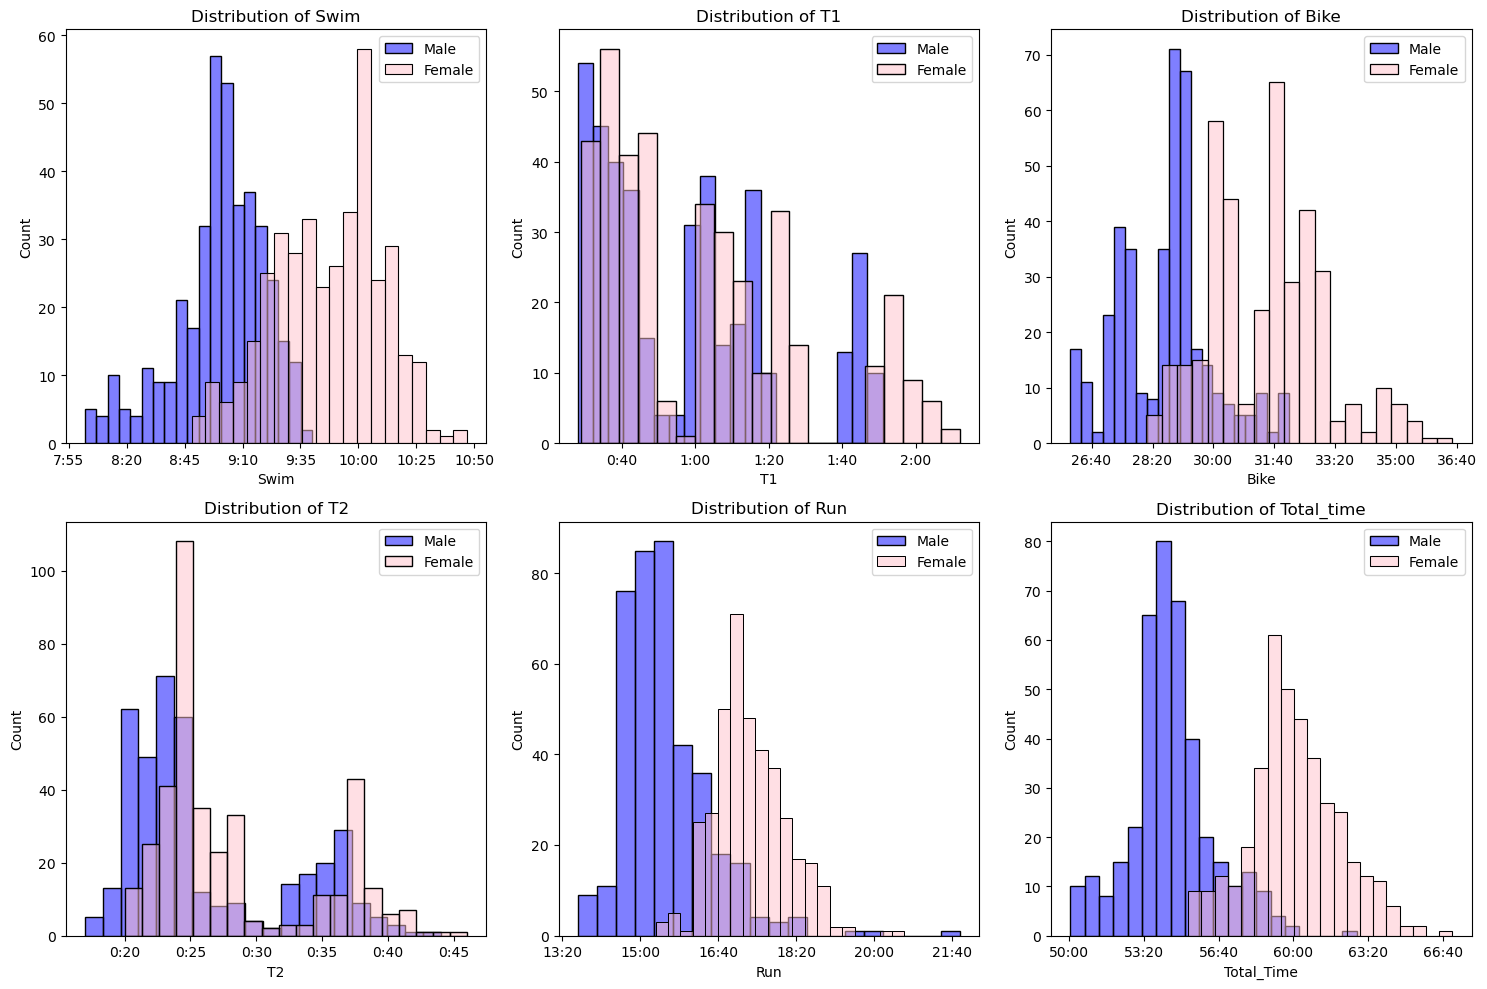

In [25]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()
columns = ['Swim', 'T1', 'Bike', 'T2', 'Run', 'Total_Time']

def seconds_to_minutes_seconds(x, pos):
    minutes = x // 60  # Integer division to get minutes
    seconds = x % 60   # Modulus to get the remaining seconds
    return f'{int(minutes)}:{int(seconds):02d}'

formatter = ticker.FuncFormatter(seconds_to_minutes_seconds)

for ax, col in zip(axes, columns):
    sns.histplot(data=df[df['Gender'] == 'Male'], x=col, ax=ax, fill=True, bins=20, color='blue', alpha=0.5, label='Male')
    sns.histplot(data=df[df['Gender'] == 'Female'], x=col, ax=ax, fill=True, bins=20, color='pink', alpha=0.5, label='Female')
    ax.set_title(f'Distribution of {col.capitalize()}', fontsize=12)
    ax.legend()
    ax.xaxis.set_major_formatter(formatter)  # Apply the formatter to the x-axis

plt.tight_layout()
plt.show()


### Which is the fastest country?

The fastest country in terms of average total time is France for males, and Great Britain for females. As previously observed, there is also much less variation in performance in the male field, making it more competitive.

#### But the number of participants per nation is not equal. So This is not truly representative.

**Weighted Average** will remedy this fault, though.
Weighted Average = sum(n.participants * average_time) / sum(n.participants)

In [26]:
avg_times = df.groupby(['Nation', 'Gender']).agg(
    Average_Time = ('Total_Time', 'mean'),
    Num_Participants = ('Total_Time', 'size'),
).sort_values(by='Average_Time', ascending=True)

#excludes Ireland which only has one athlete and skews the results.
avg_times=avg_times[avg_times['Num_Participants']>3]

#round the mean
avg_times['Average_Time']=avg_times['Average_Time'].round()




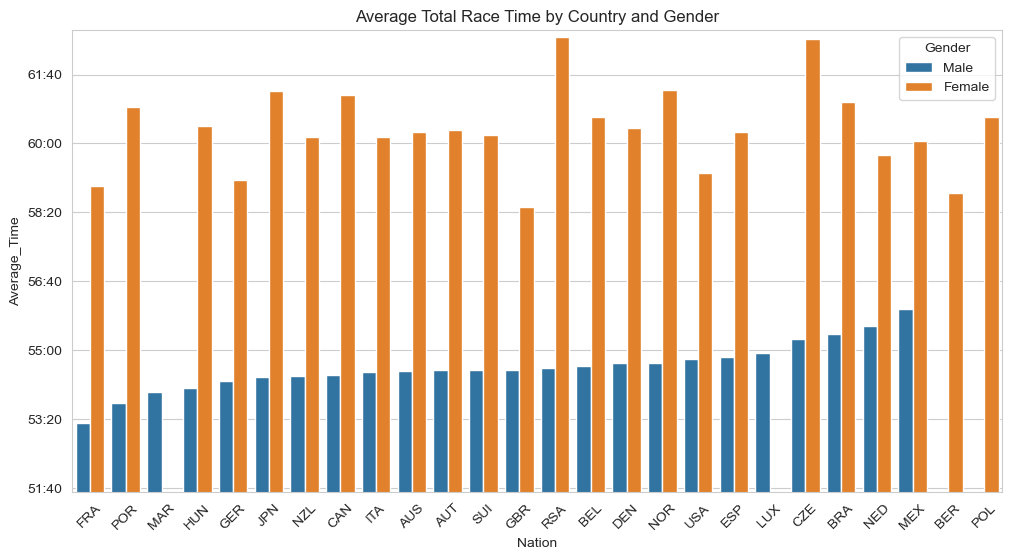

In [27]:
#Average Total Race Time by Country and Gender, Ascending 

sns.set_style('whitegrid')
plt.figure(figsize=(12,6))
sns.barplot(data=avg_times.reset_index().sort_values(by='Average_Time', ascending=True),
            x='Nation',
            y='Average_Time',
            hue='Gender')
plt.xticks(rotation=45)
plt.ylim(avg_times['Average_Time'].min()-100,
         avg_times['Average_Time'].max()+10) #padding on axis limits
plt.gca().yaxis.set_major_formatter(formatter) #change labels to minutes equivalent
plt.title('Average Total Race Time by Country and Gender')
plt.show()

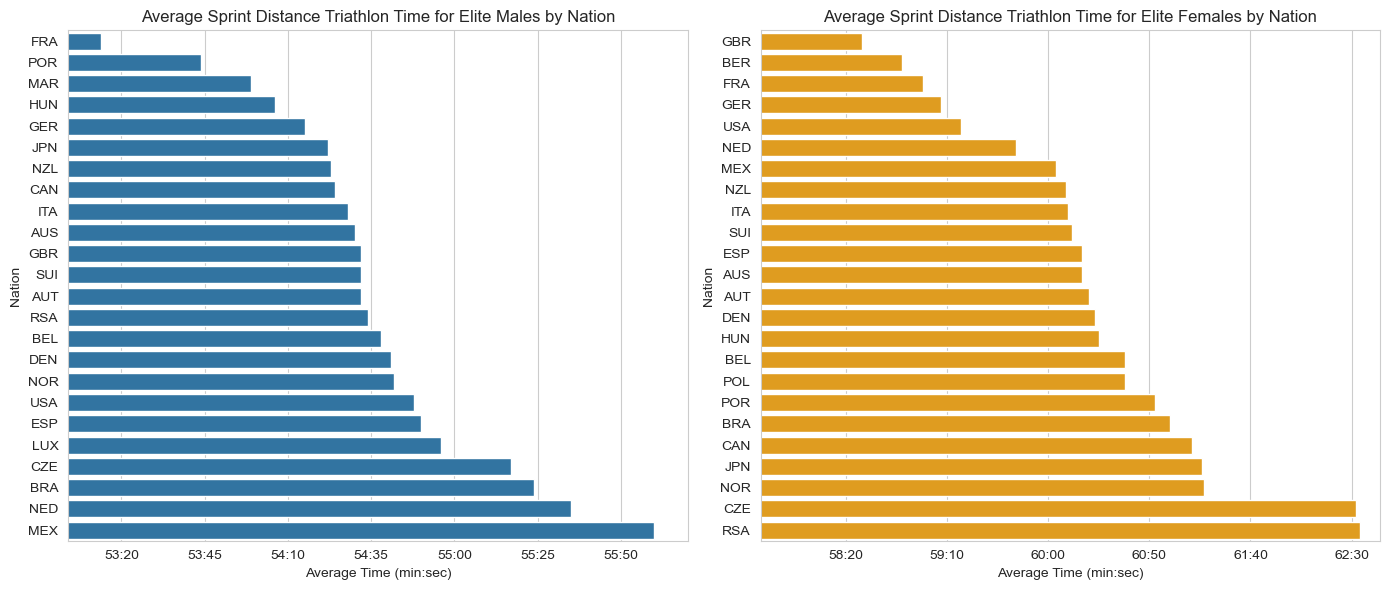

In [28]:
# Reset index to make 'Gender' a column again
avg_times_reset = avg_times.reset_index()

# Filter the data into separate DataFrames for males and females
males_data = avg_times_reset[avg_times_reset['Gender'] == 'Male']
females_data = avg_times_reset[avg_times_reset['Gender'] == 'Female']

# Create the subplots (2 subplots in a row)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Create the barplot for males on the first subplot
sns.barplot(x='Average_Time', y='Nation', data=males_data, ax=axes[0])
axes[0].set_title('Average Sprint Distance Triathlon Time for Elite Males by Nation')
axes[0].set_xlabel('Average Time (min:sec)')
axes[0].set_ylabel('Nation')
axes[0].xaxis.set_major_formatter(formatter)
axes[0].set_xlim(males_data['Average_Time'].min() - 10, 
                 males_data['Average_Time'].max() + 10)


# Create the barplot for females on the second subplot
sns.barplot(x='Average_Time', y='Nation', data=females_data, ax=axes[1], color='orange')
axes[1].set_title('Average Sprint Distance Triathlon Time for Elite Females by Nation')
axes[1].set_xlabel('Average Time (min:sec)')
axes[1].set_ylabel('Nation')
axes[1].xaxis.set_major_formatter(formatter)
axes[1].set_xlim(females_data['Average_Time'].min() - 50, 
                 females_data['Average_Time'].max() + 10)

# Adjust layout to make room for titles and labels
plt.tight_layout()

# Show the plot
plt.show()


In [29]:
#more interactive visual with hover labels
import plotly.express as px

# Create an interactive barplot
fig = px.bar(
    avg_times.reset_index(),
    x='Nation',
    y='Average_Time',
    color='Gender',
    text='Average_Time',  # Optional: Show the average time directly on bars
    hover_data={'Average_Time': True, 'Num_Participants': True, 'Nation': False}
)

# Update layout for better appearance
fig.update_layout(
    title="Average Time by Nation and Gender",
    xaxis_title="Nation",
    yaxis_title="Average Time",
    legend_title="Gender",
    template="plotly_dark",  # Optional for a dark theme
)

# Show the figure
fig.show()

### Which are the best all-rounders?

An all-rounder is an athlete who performs consistently well across all disciplines. This means that they have a low standard deviation across all disciplines, compared to other athletes. 

### Age focus

New Age_Cat column creates bins for ages as a practise exercise; the same analysis is easily achieved using sns.histplot as demonstrated below. It shows that the majority of elite athletes peak at 30, and for females this extends to 35.

Nevertheless, categorising ages allows for a relationship analysis using swarmplots.

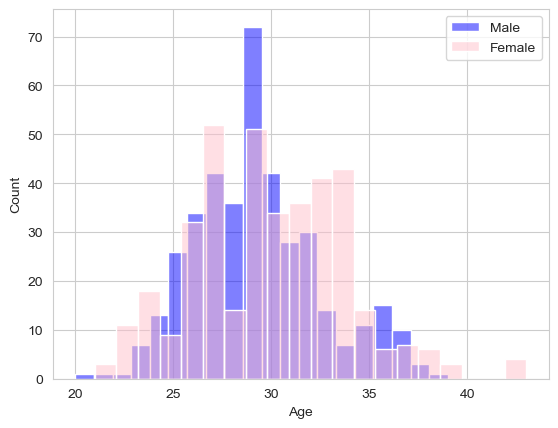

In [53]:
# age distribution 

sns.histplot(data=df[df['Gender'] == 'Male'], x='Age', fill=True, bins=20, color='blue', alpha=0.5, label='Male')
sns.histplot(data=df[df['Gender'] == 'Female'], x='Age', fill=True, bins=20, color='pink', alpha=0.5, label='Female')
plt.legend()
plt.show()

In [51]:
def map_age(age:int)->str:
    if 18 <= age <=24:
        age_group = 'Young Adult'
    elif 25 <= age <= 34:
        age_group = 'Adult'
    elif 35 <= age <= 44:
        age_group =  'Middle Age'
    elif age > 44:
        age_group =  'Senior'
    else:
        age_group = 'Unknown'
    
    return age_group 

df['Age_Cat'] = df['Age'].apply(map_age)


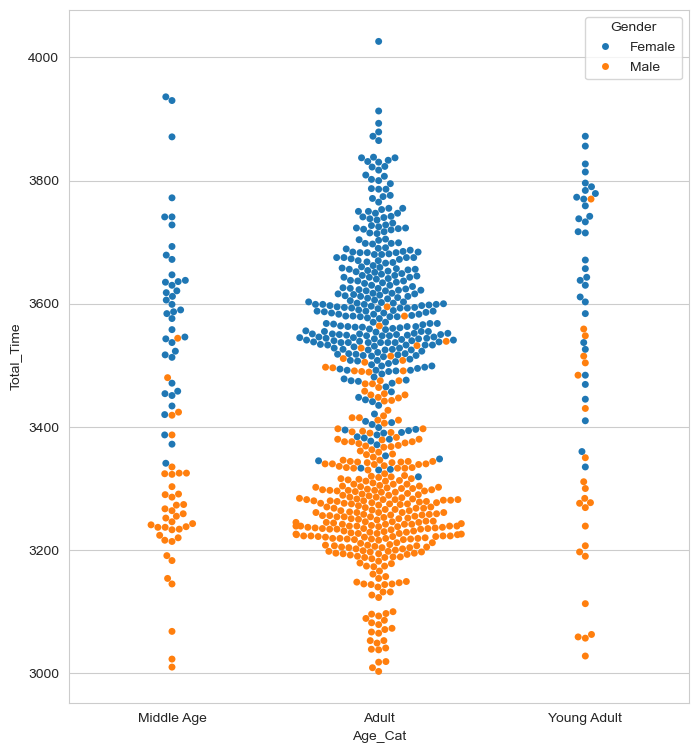

In [63]:
plt.figure(figsize=(8,9))
sns.swarmplot(data=df, x='Age_Cat', y='Total_Time', hue='Gender')
plt.show()

<Axes: xlabel='YOB', ylabel='Total_Time'>

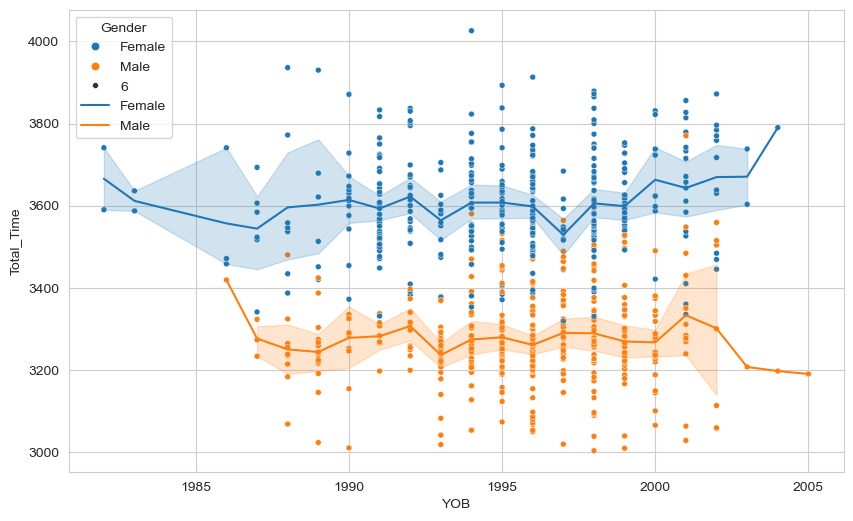

In [68]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='YOB', y='Total_Time', hue='Gender', size=6)
sns.lineplot(data=df, x='YOB', y='Total_Time', hue='Gender')